In [1]:
import create_heatmap as chm

In [2]:
chm.convertXYpoints()

created output T:\Models\Heatmap\jobs45.shp
reproject output T:\Models\Heatmap\jobs45prj.shp


In [3]:
chm.convertXYpoints("households_2045_xy")

created output T:\Models\Heatmap\households45.shp
reproject output T:\Models\Heatmap\households45prj.shp


In [2]:
for cellSize in [25, 36]: #list(range(50, 251, 50))
    for method in ['Kernel', 'Point']:
        for intableName in ["jobs_2045_xy", 'households_2045_xy']:
            chm.createHeatmap(cellSize = cellSize, intableName = intableName, 
                              method = method, xypoint = True)

creating raster data for jobs heatmap in 2045 using Kernel Density with a cell size 25...
completed...
creating raster data for households heatmap in 2045 using Kernel Density with a cell size 25...
completed...
creating raster data for jobs heatmap in 2045 using Point Density with a cell size 25...
completed...
creating raster data for households heatmap in 2045 using Point Density with a cell size 25...
completed...
creating raster data for jobs heatmap in 2045 using Kernel Density with a cell size 36...
completed...
creating raster data for households heatmap in 2045 using Kernel Density with a cell size 36...
completed...
creating raster data for jobs heatmap in 2045 using Point Density with a cell size 36...
completed...
creating raster data for households heatmap in 2045 using Point Density with a cell size 36...
completed...


In [2]:
cellSize = 100
intableName = "jobs_2045_xy"

In [3]:
import os, arcpy

ExtensionName = 'Spatial'
if arcpy.CheckExtension(ExtensionName) == "Available":
        arcpy.CheckOutExtension(ExtensionName)
        
arcpy.env.workspace = r'T:\Models\StoryMap\UrbanSim\UrbanSim.gdb'
arcpy.env.overwriteOutput = True
MPOBound = "V:/Data/Transportation/MPO_Bound.shp"
arcpy.env.extent = MPOBound
mask = MPOBound

path = r'T:\Trans Projects\Model Development\UrbanSim_LandUse\Output\Simulation_47_Final_RTP'
outpath = r'T:\Models\Heatmap'

In [20]:
method = 'Kernel'
s = intableName.split("_")
outLayer = os.path.join(outpath, s[0] + s[1][2:4] + ".shp")
outRaster = os.path.join(outpath, method[0] + s[0] + s[1][2:4] + "_" + str(cellSize) + ".tif")

In [21]:
outRaster

'T:\\Models\\Heatmap\\Kjobs45_100.tif'

In [23]:
arcpy.gp.KernelDensity_sa("jobs45_prj", "NONE", outRaster, cellSize, "", 
                          "SQUARE_KILOMETERS", "DENSITIES", "")  

<geoprocessing server result object at 0x2471a8fb150>

In [24]:
method = 'Point'
outRaster = os.path.join(outpath, method[0] + s[0] + s[1][2:4] + "_" + str(cellSize) + ".tif")

In [25]:
arcpy.gp.PointDensity_sa("jobs45_prj", "NONE", outRaster, cellSize, "", "SQUARE_KILOMETERS")                                       

<geoprocessing server result object at 0x2471a8fb870>

In [4]:
chm.createHeatmap(xypoint = True)

creating raster data for heatmap...
completed...


In [5]:
chm.createHeatmap(method = "Point", xypoint = True)

creating raster data for heatmap...
completed...


In [43]:
import rasterio, fiona, os
import contextily as ctx
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.ticker import ScalarFormatter
from rasterio.plot import show, show_hist
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [44]:
path = r'T:\Models\Heatmap'

In [45]:
year = 2045
data = "jobs"
dataName = 'Employment'
method = 'Kernel'
cellSize = 100

In [46]:
file = os.path.join(path, method + data + str(year)[2:4] + "_" + str(cellSize) + ".tif")

In [48]:
src = rasterio.open(file)

In [49]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

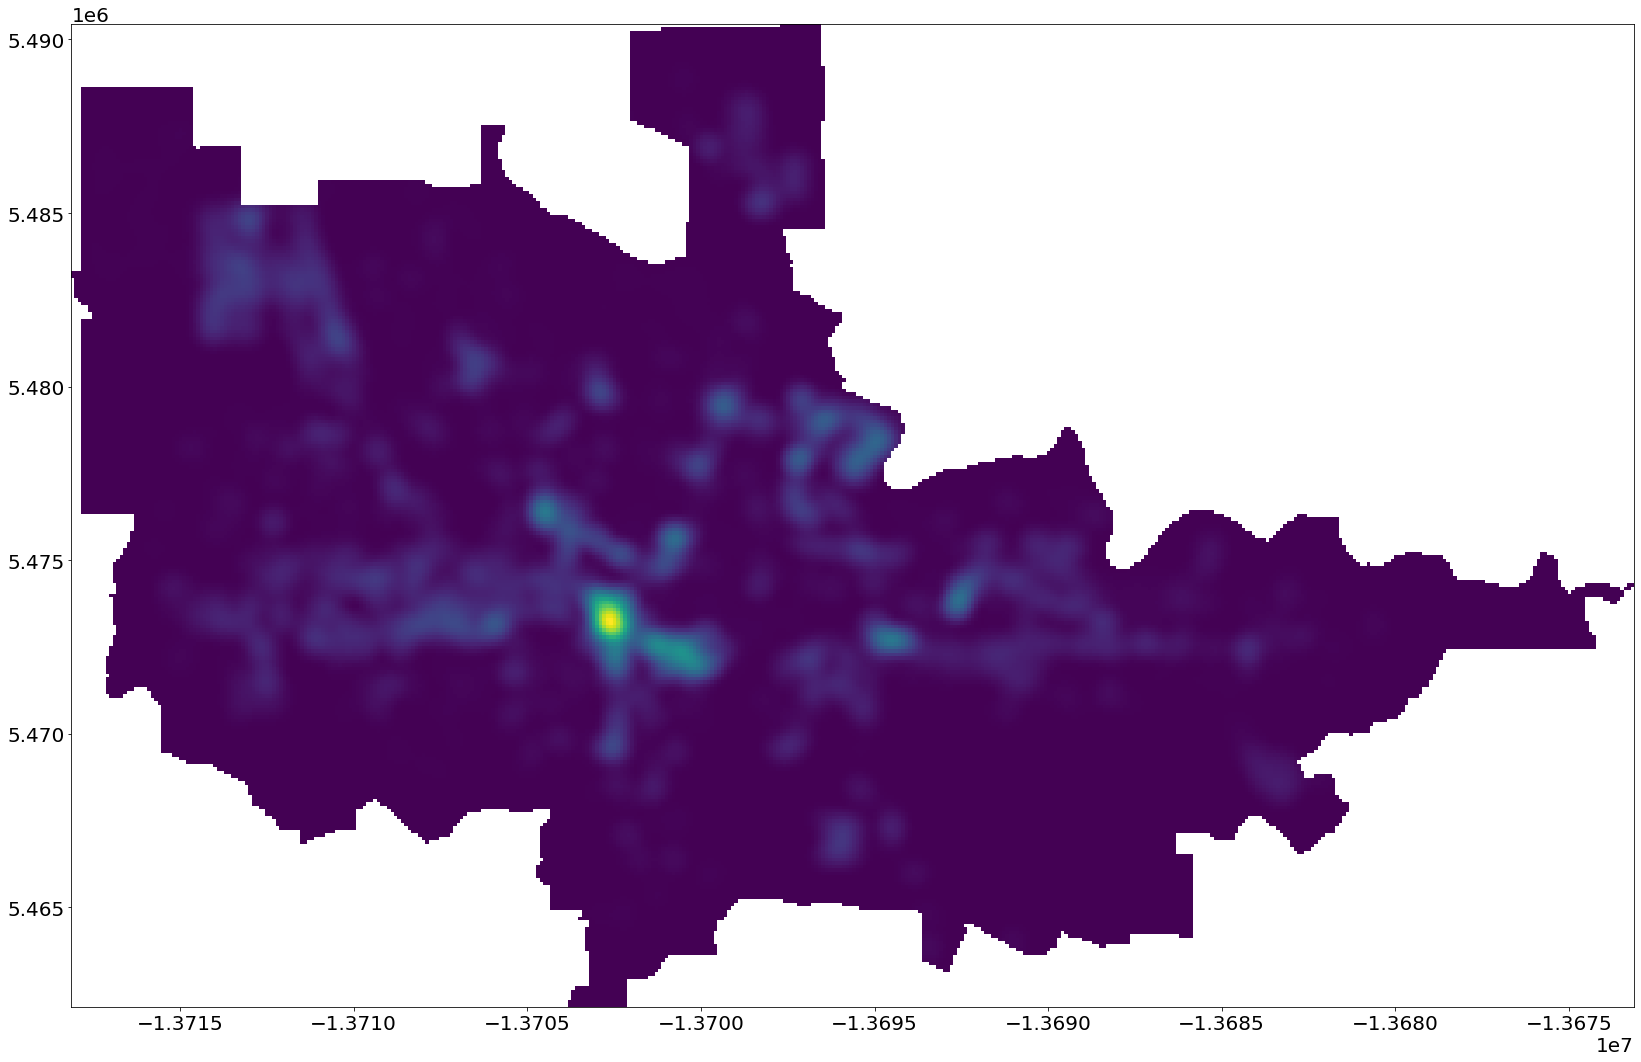

<AxesSubplot:>

In [50]:
fig, ax = plt.subplots(1, figsize=(28, 24))
show(src)

In [51]:
colormap = 'Reds'

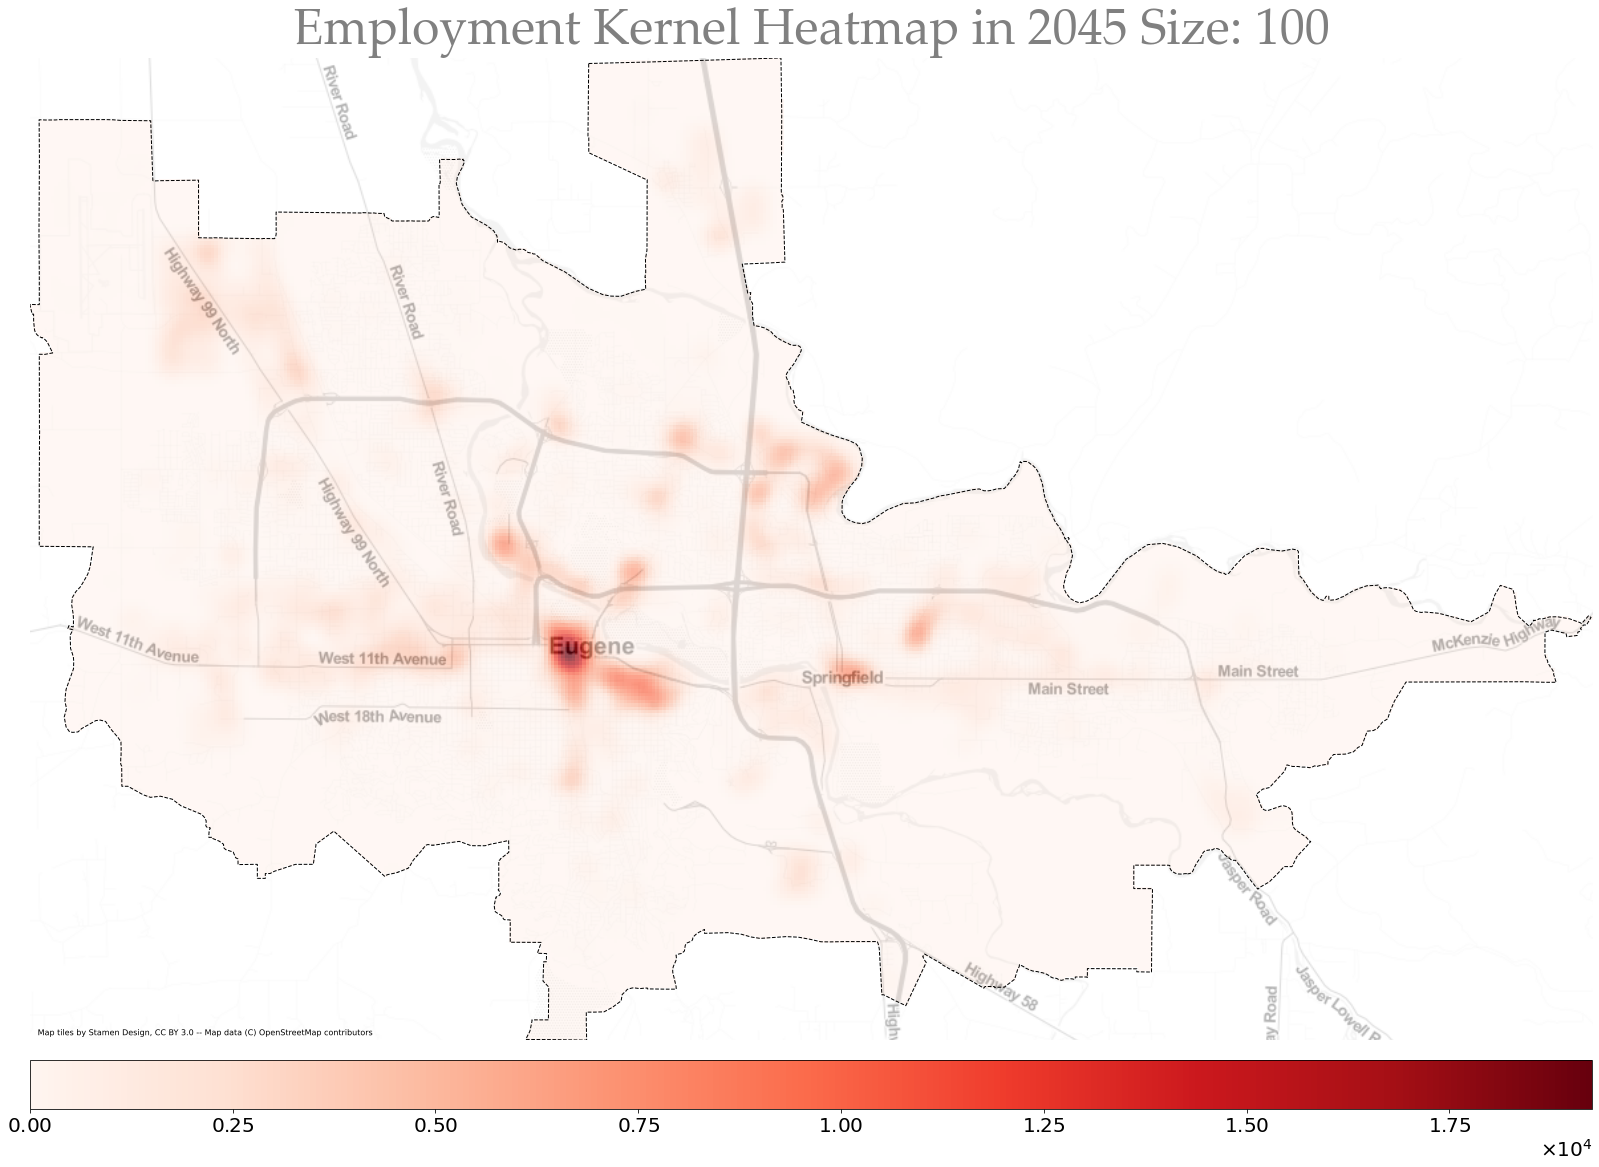

In [52]:
fig, ax = plt.subplots(1, figsize=(28, 24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad="2%")
data = src.read(1)
ndata = np.where(data == data.min(), np.nan, data)
data_ex = data[data != data.min()]
image = show(ndata,  
             transform=src.transform,
             ax=ax,
             cmap=colormap)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
ax.set_title(dataName + " " + method + " Heatmap in " + str(year) + " Size: " + str(cellSize), 
             fontsize=50, fontname="Palatino Linotype", color="grey", loc = 'center')
image_hidden = ax.imshow(ndata,cmap=colormap)
fmt = mpl.ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
cbar = plt.colorbar(image_hidden, format=fmt, ax=ax, cax=cax, orientation="horizontal")
mpl.rcParams.update({'font.size': 20})
ax.axis("off");

In [1]:
import plot_heatmap as phm

Saved image Kerneljobs45_100.png...


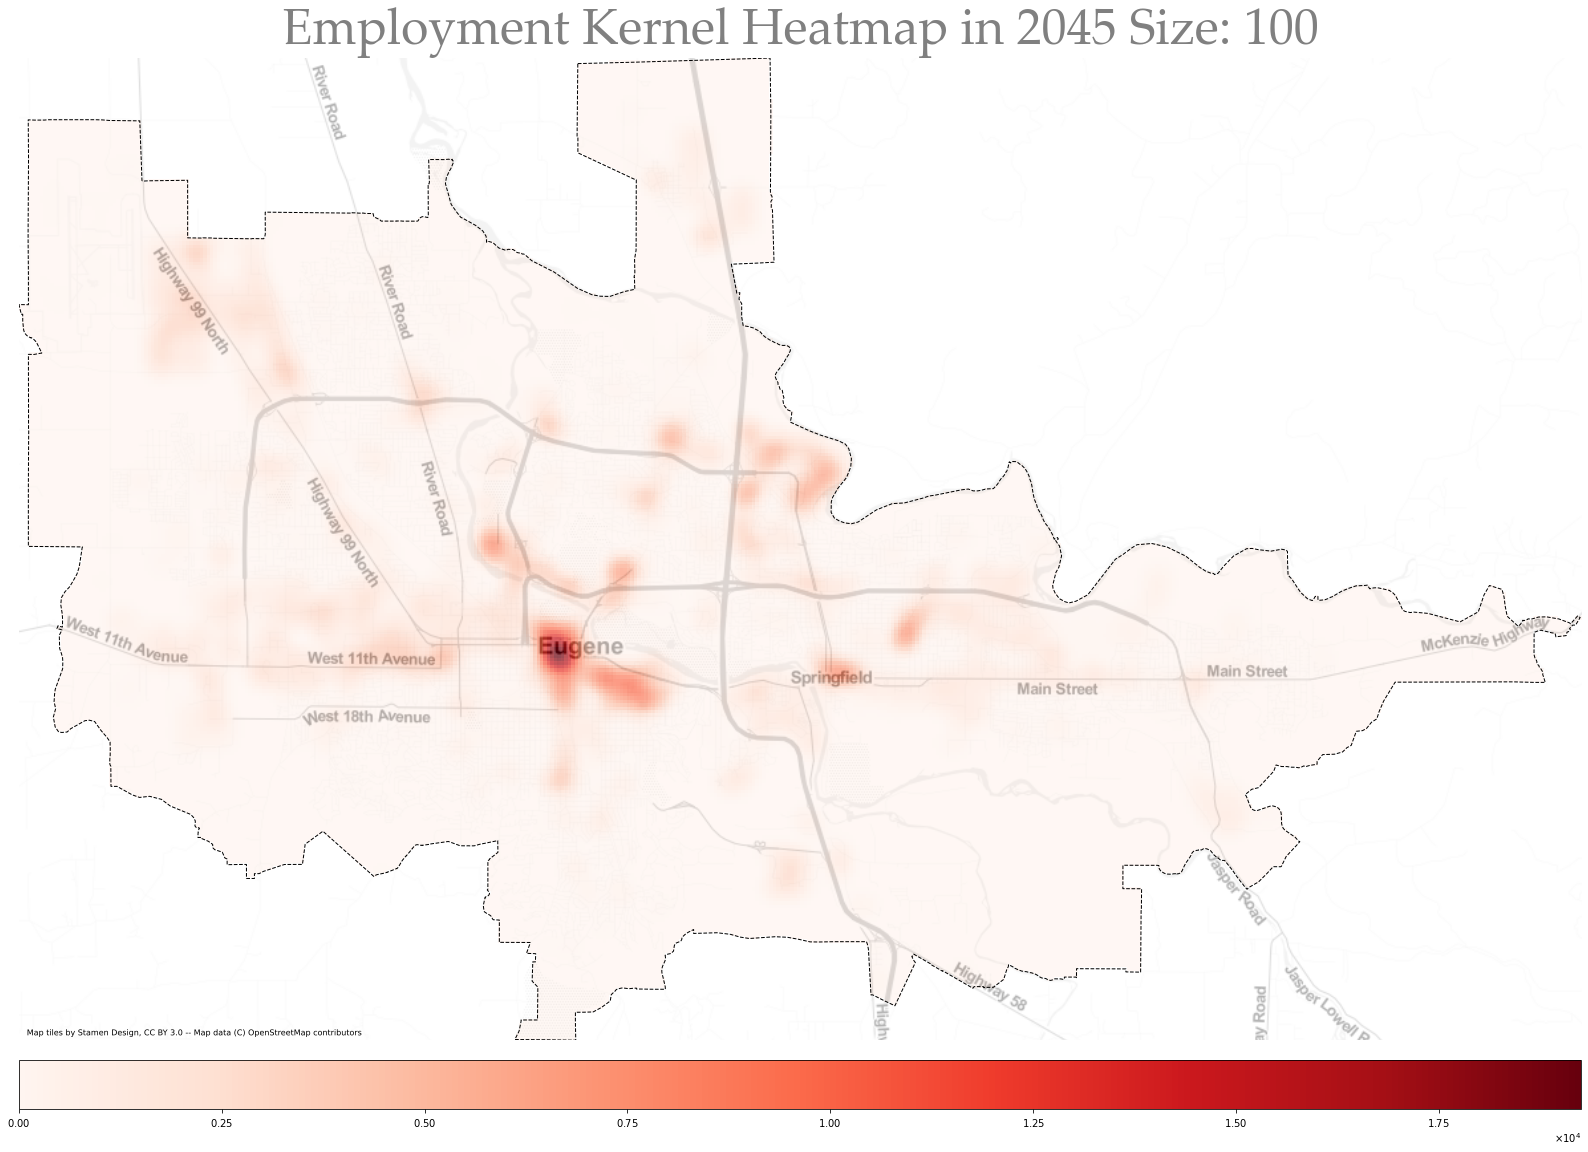

In [2]:
phm.plotHeatmap(export = True)

In [3]:
datasets = ["jobs", "households"]
dataNames = ["Employment", "Households"]

Saved image Kerneljobs45_25.png...
Saved image Kernelhouseholds45_25.png...
Saved image Pointjobs45_25.png...
Saved image Pointhouseholds45_25.png...
Saved image Kerneljobs45_36.png...
Saved image Kernelhouseholds45_36.png...
Saved image Pointjobs45_36.png...
Saved image Pointhouseholds45_36.png...


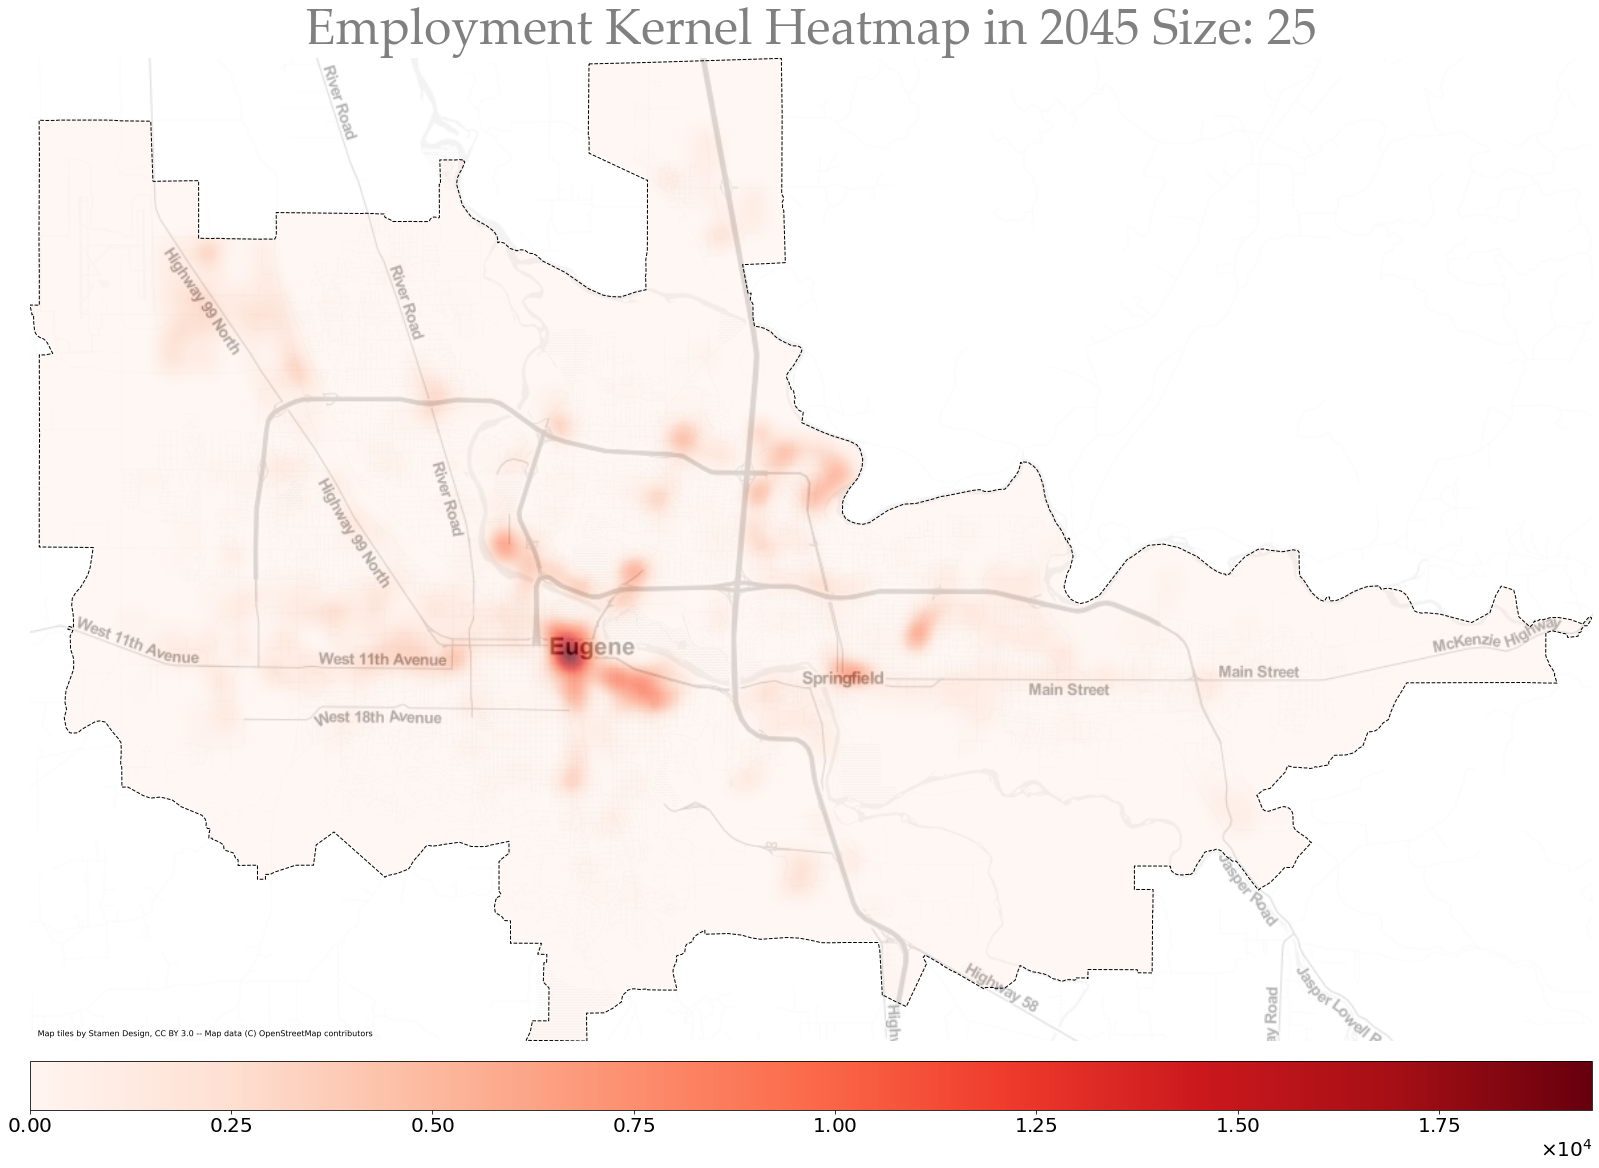

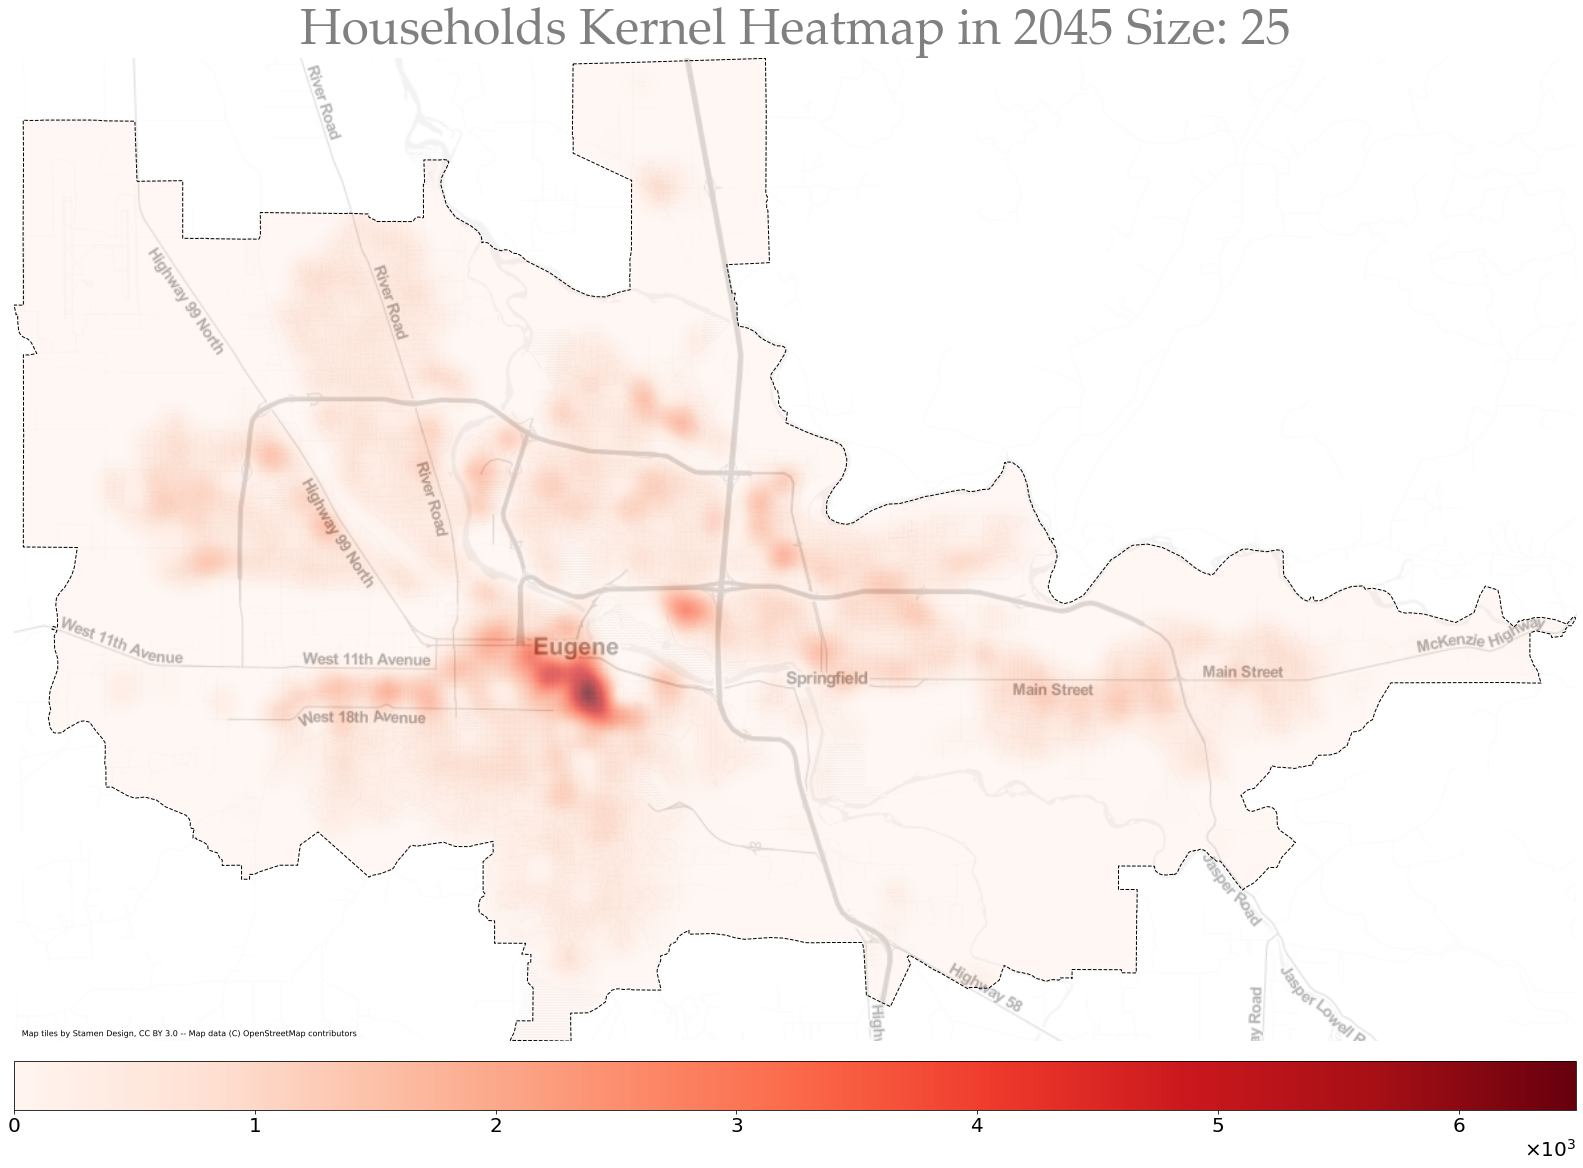

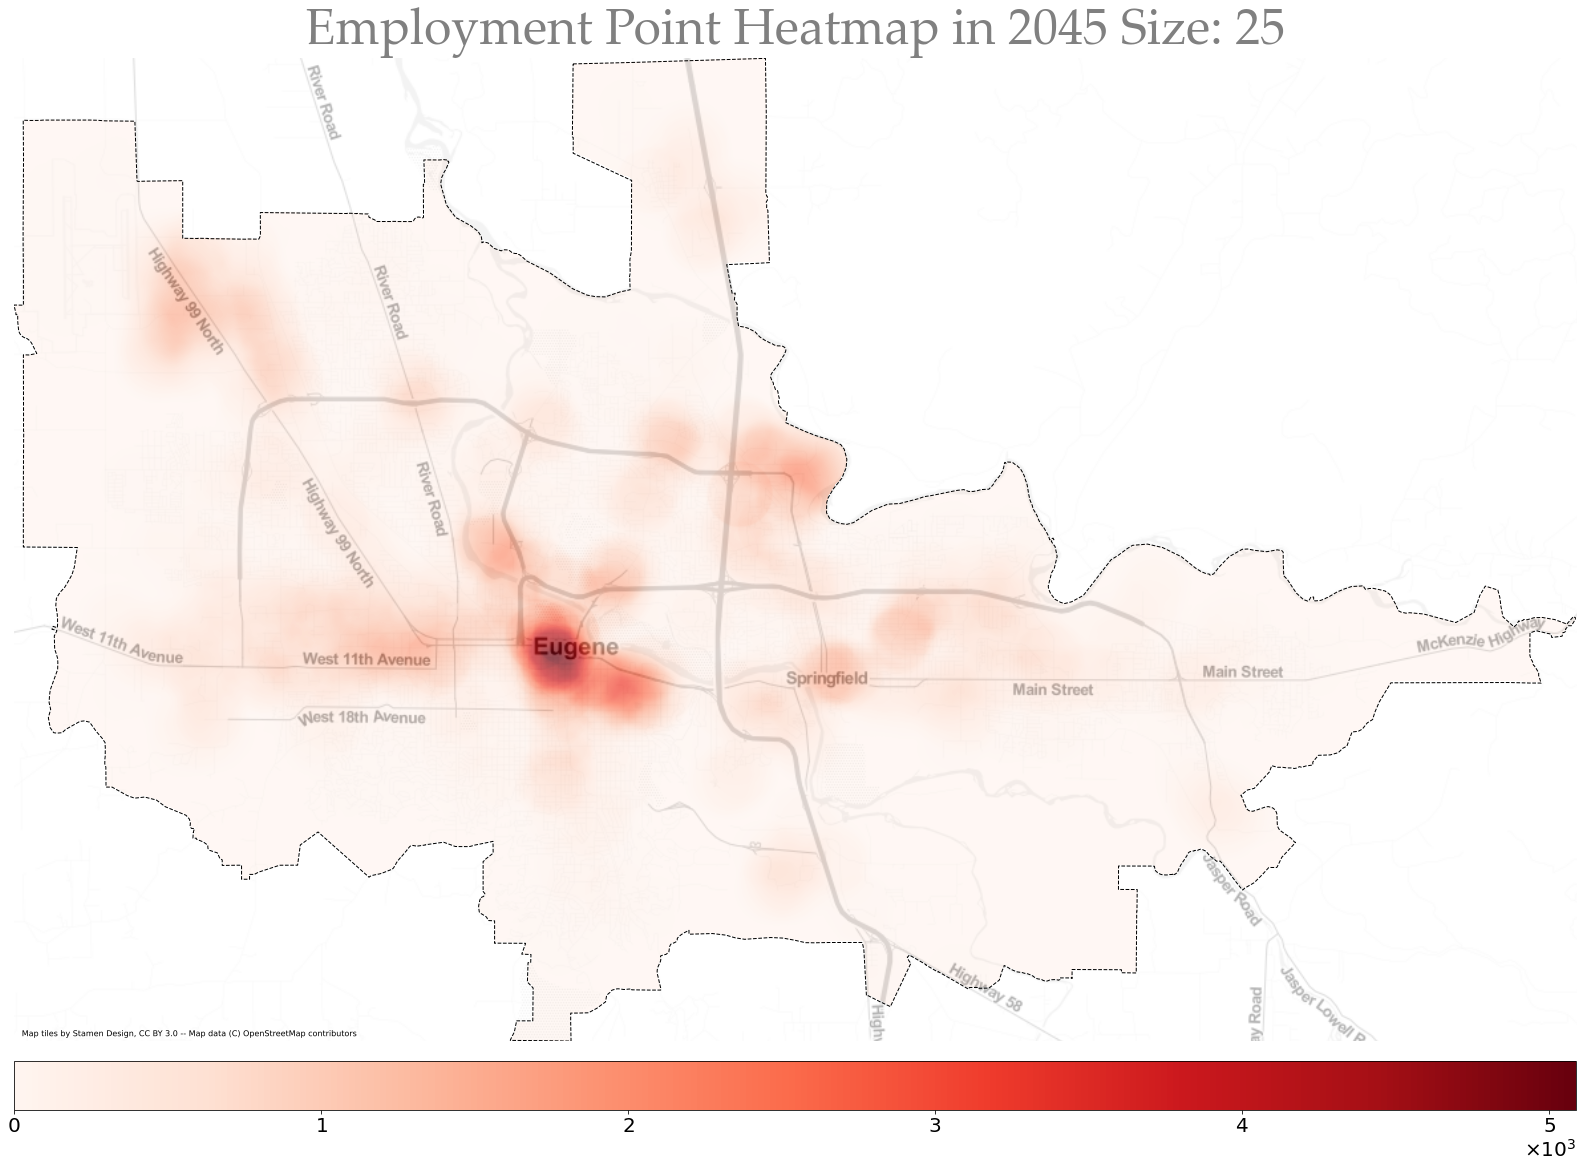

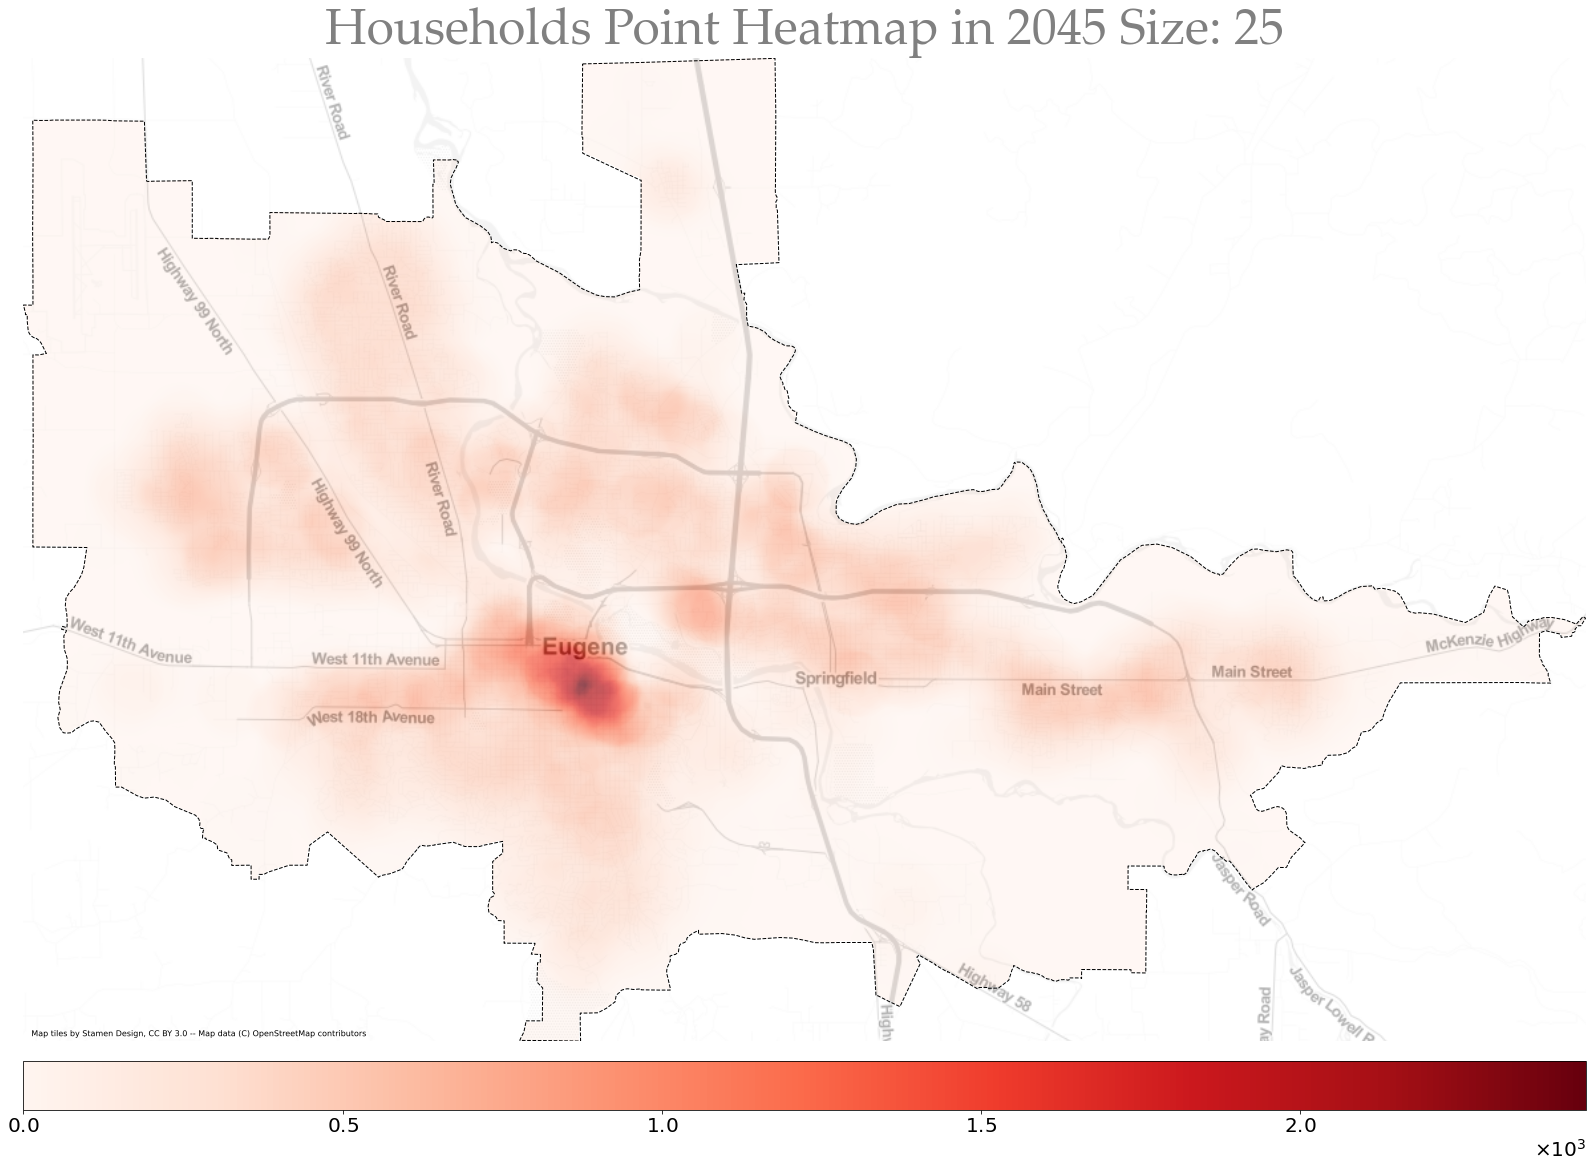

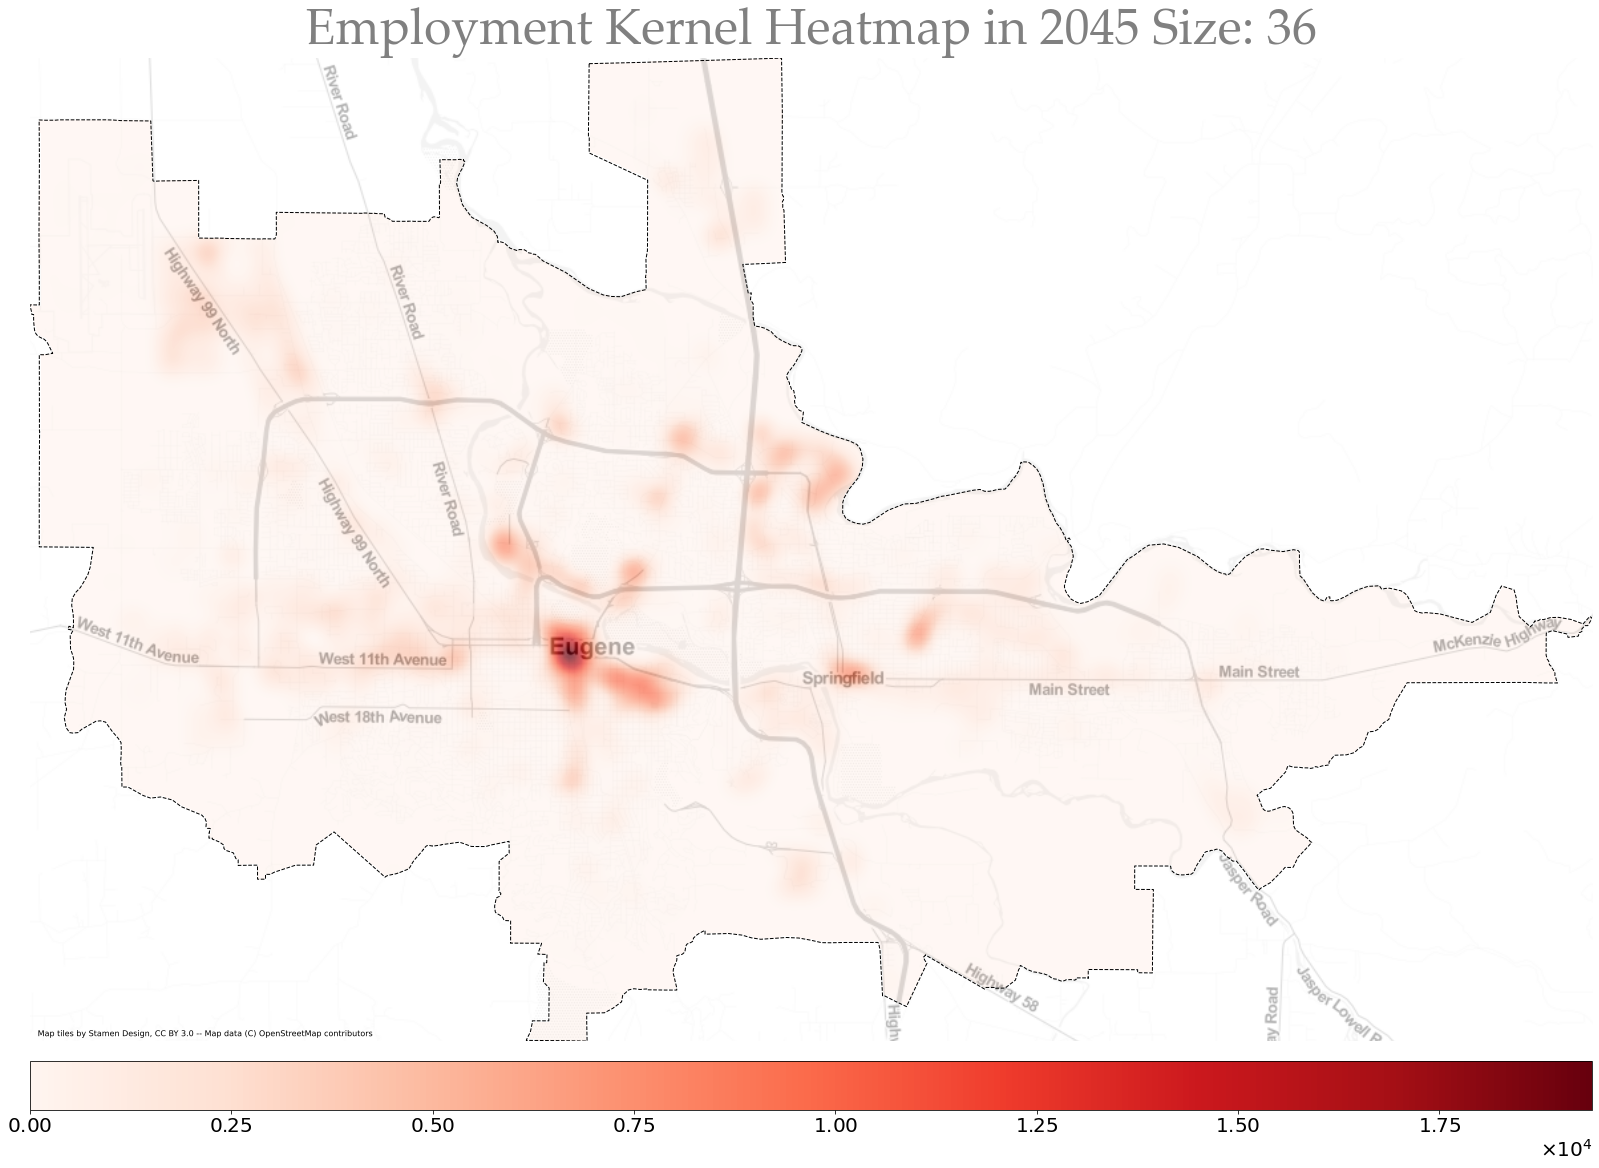

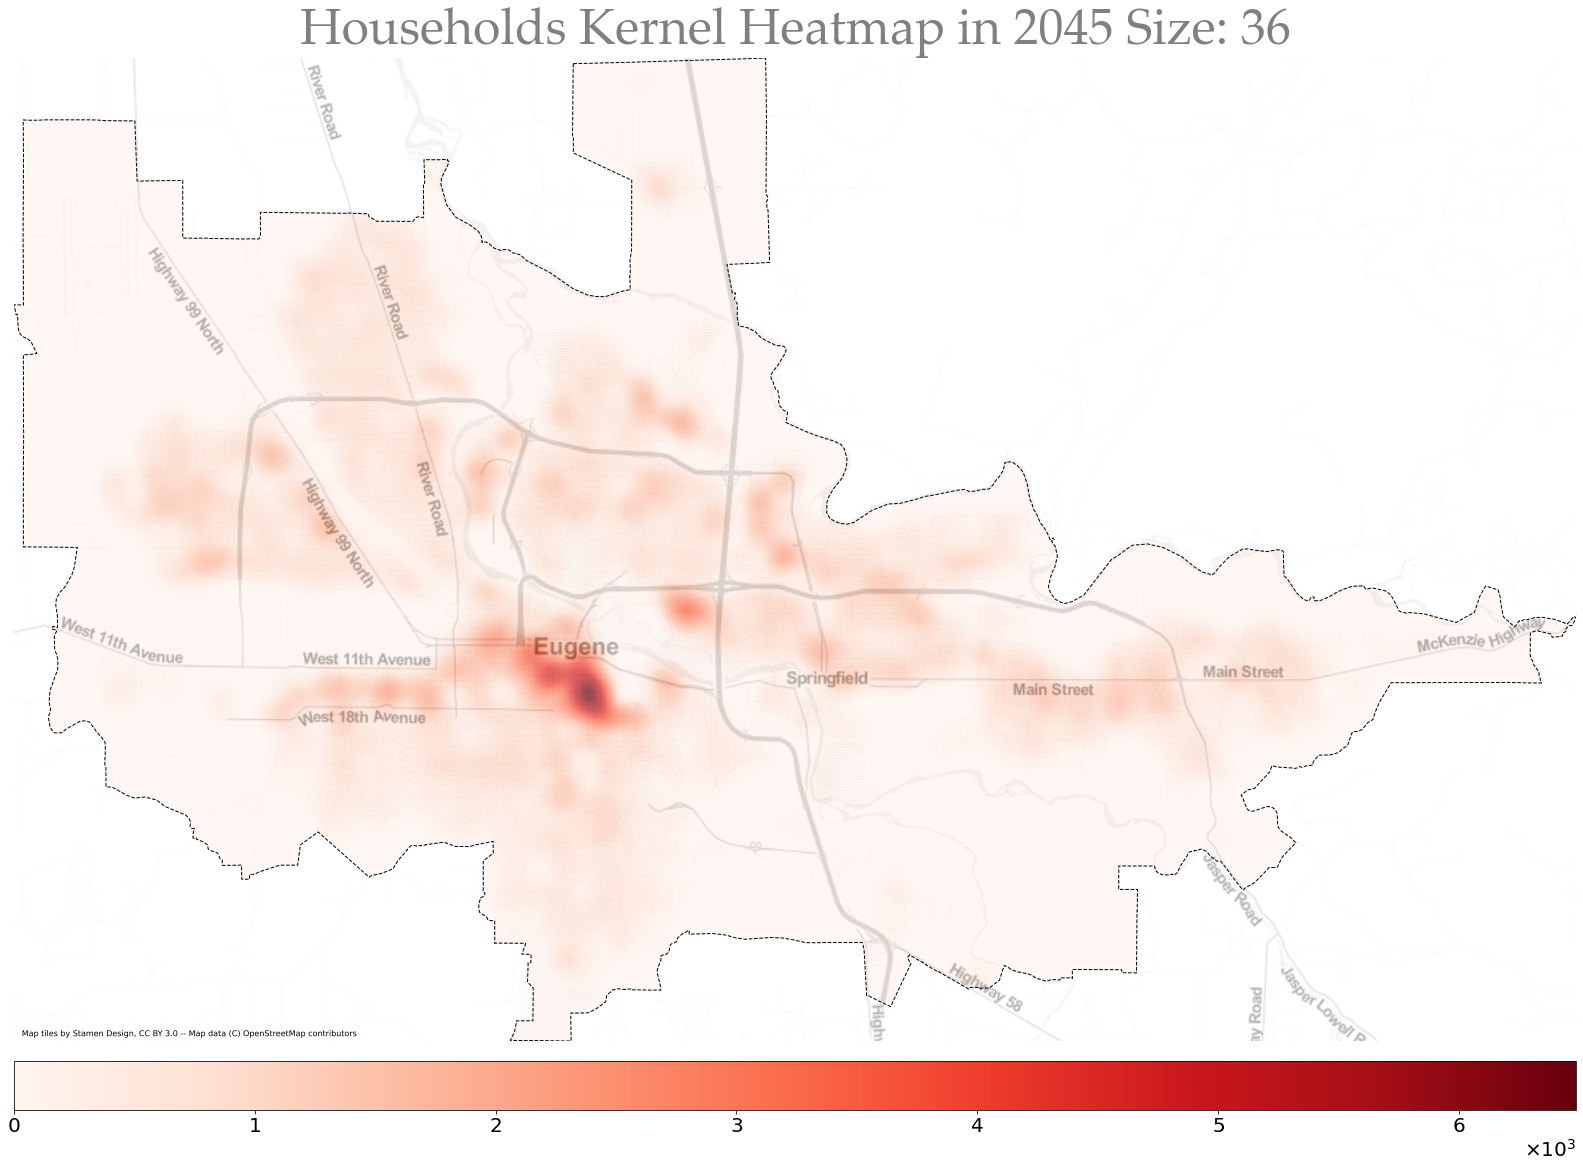

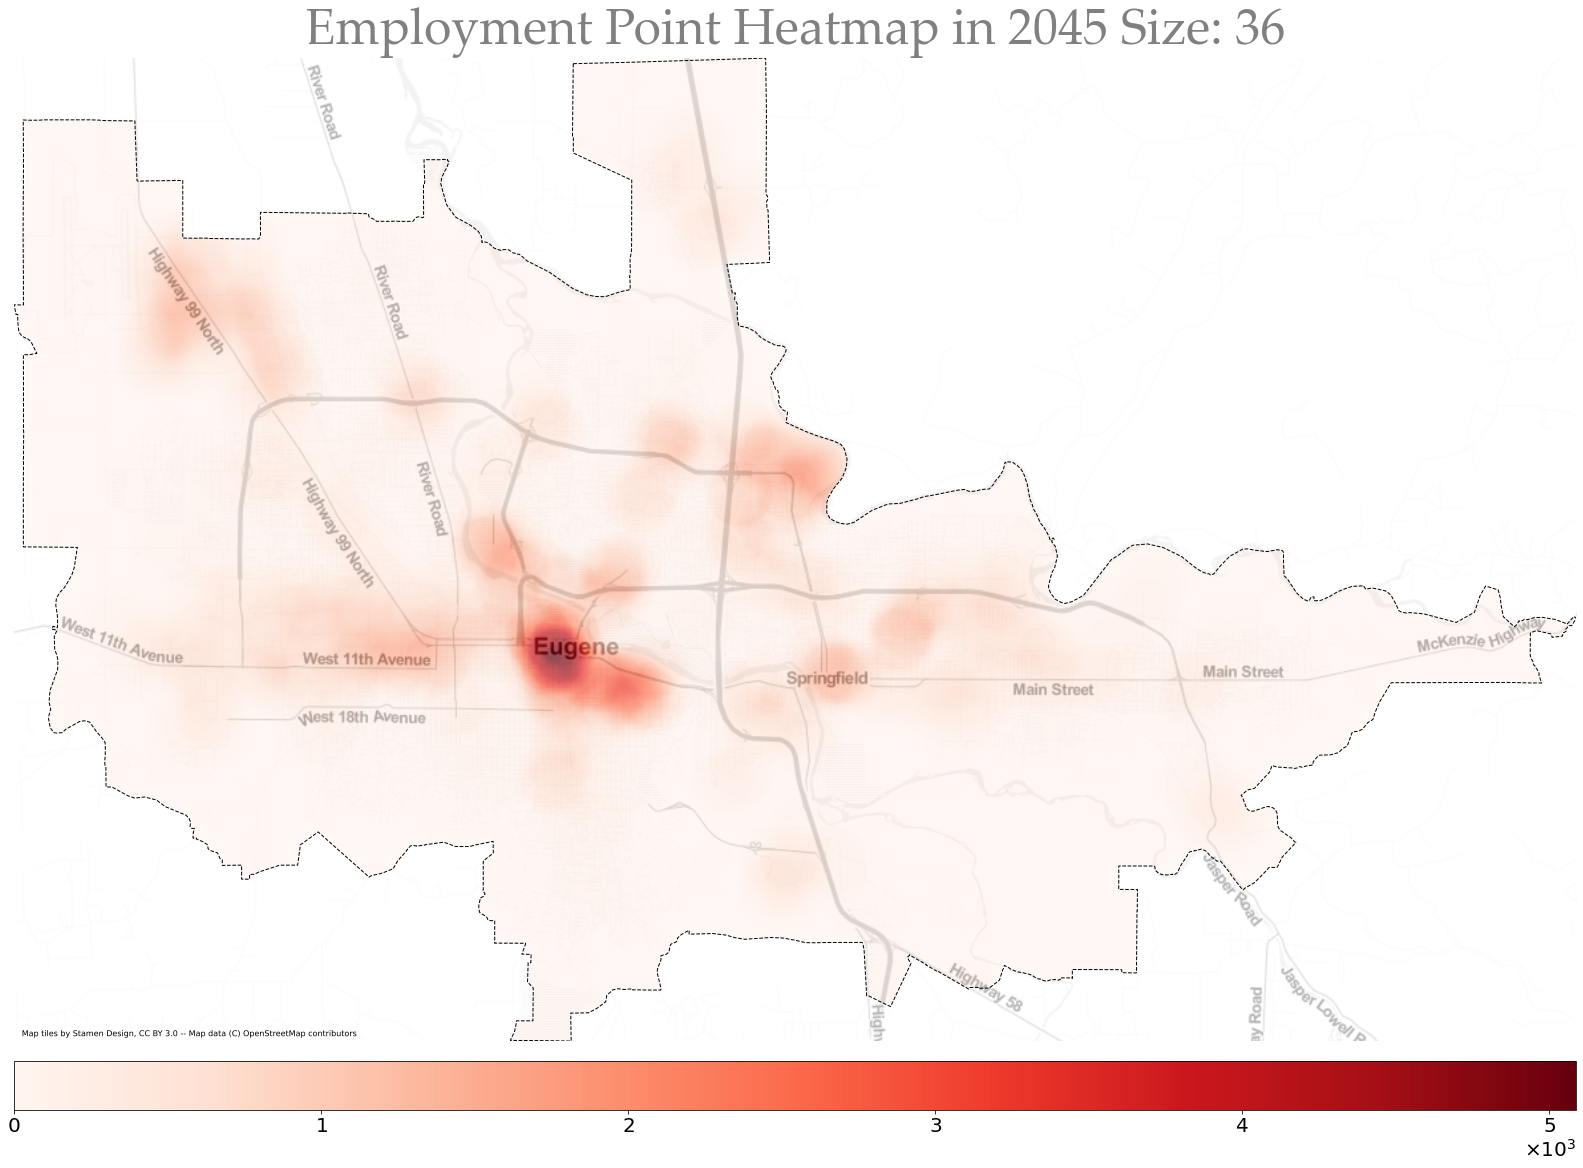

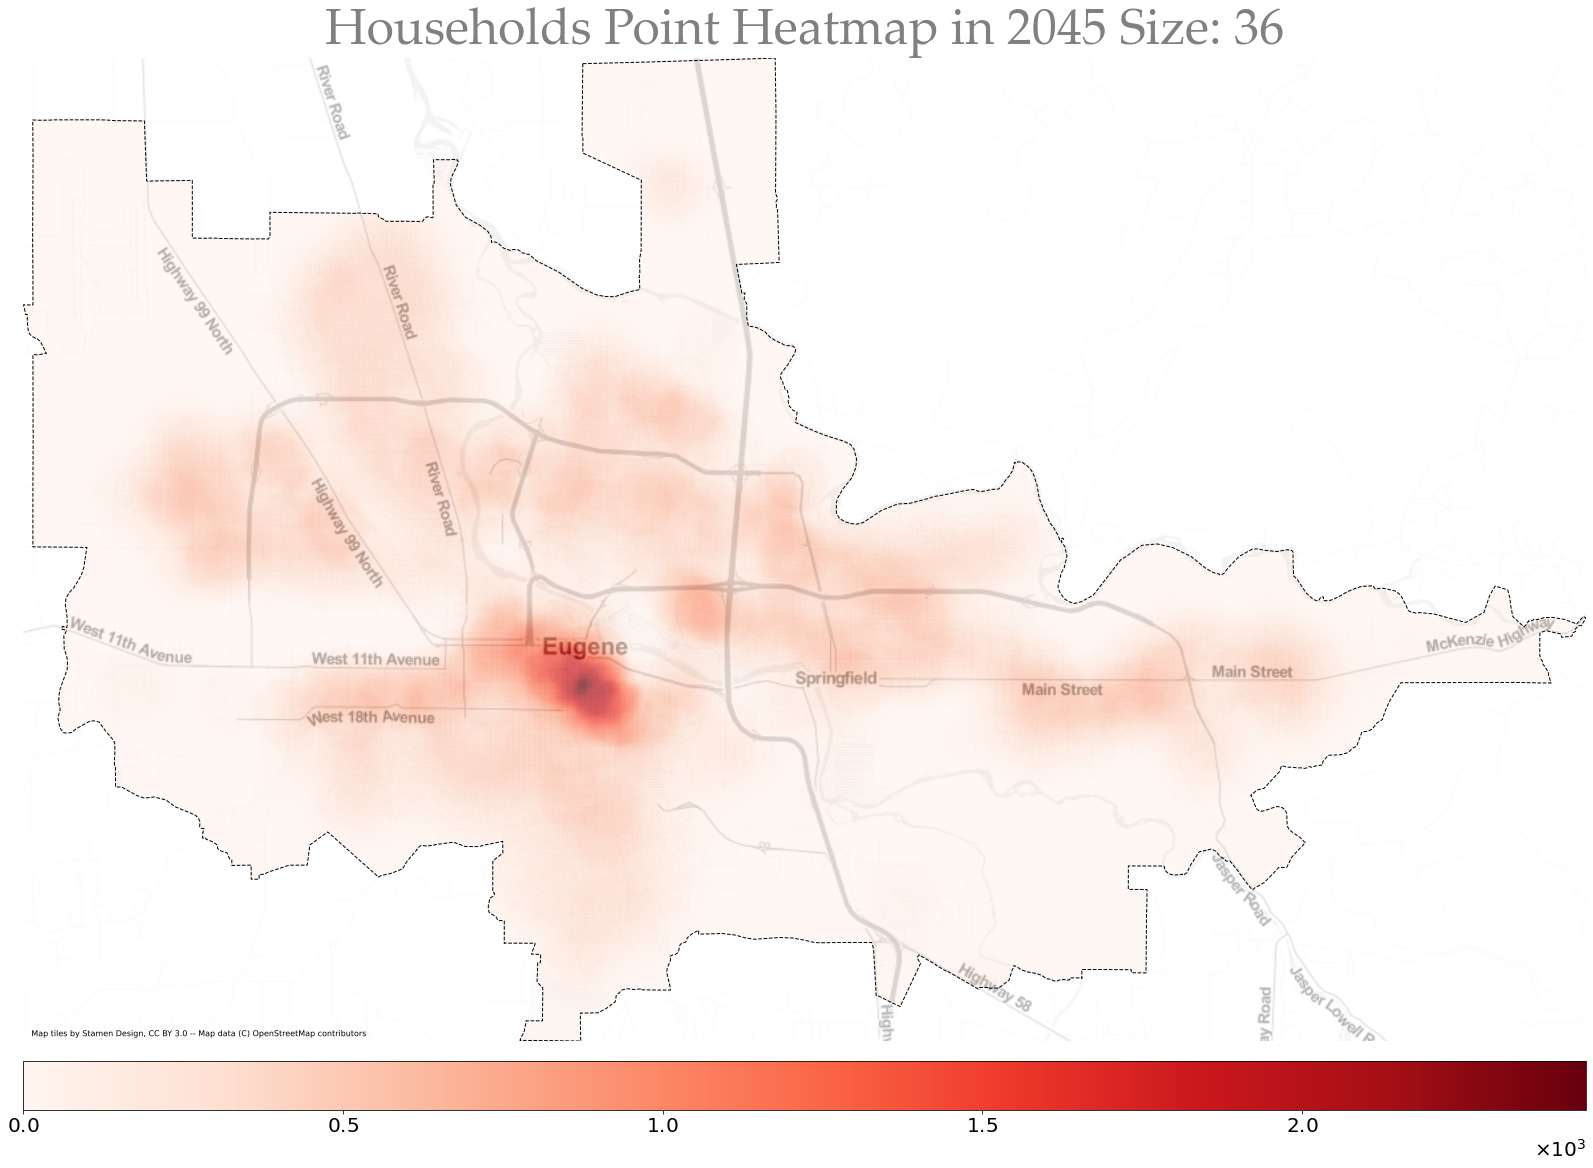

In [6]:
for cellSize in [25, 36]: # list(range(50, 251, 50))
    for method in ['Kernel', 'Point']:
        for dataset in datasets:
            phm.plotHeatmap(data = dataset , dataName = dataNames[datasets.index(dataset)], 
                            method = method, cellSize = cellSize, export = True)